In [ ]:
import unittest
import cv2
import omnialigner as om

plt = om.pl.plt
%reload_ext autoreload
%autoreload 2

loading weights from: /cluster/home/bqhu_jh/share/miniconda3/envs/omni/lib/python3.10/site-packages/omnialigner/vendor/accelerated_features/modules/../weights/xfeat.pt
grid_M_3x3 tensor([[-0.9635,  0.2681],
        [ 0.2669,  0.9679],
        [-0.0044, -0.0734]])


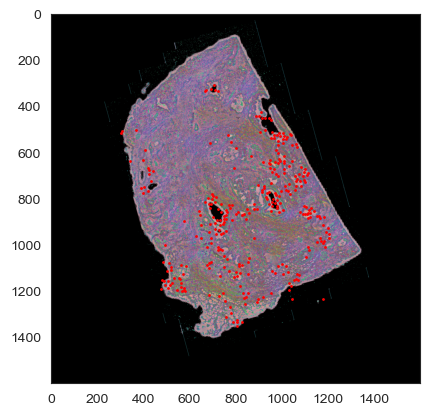

In [42]:
image_F = cv2.imread("./F.png")
image_M = cv2.imread("./M.png")
tensor_F = om.tl.im2tensor(image_F)
tensor_M = om.tl.im2tensor(image_M)

kd = om.kp.detect_AngleFlipScale(tensor_F, tensor_M, detector=None)
kd.dataset['image_label'] = tensor_F
kd.dataset['image_input'] = tensor_M

tensor_tfrs = kd.calculate_tfrs()

img_M_moved = kd.move_img_M(tensor_tfrs=tensor_tfrs)
kpt_F = kd.dataset["train_label"]
kpt_M = kd.move_kpt_M(tensor_tfrs=tensor_tfrs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img_M_moved)
ax.scatter(kpt_M[:, 0], kpt_M[:, 1], c='r', s=1)



In [43]:
kpt_M = kd.move_kpt_M()

grid_M_3x3 tensor([[-0.9661,  0.2681],
        [ 0.2566,  0.9677],
        [-0.0036, -0.0734]])


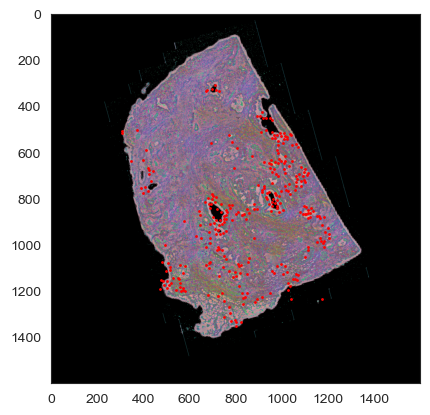

In [44]:
import torch
plt = om.pl.plt



# kpt_M = kd.move_kpt_M(tensor_tfrs=tensor_)
# kpt_M = kd.move_kpt_M()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img_M_moved)
ax.scatter(kpt_M[:, 0], kpt_M[:, 1], c='r', s=1)


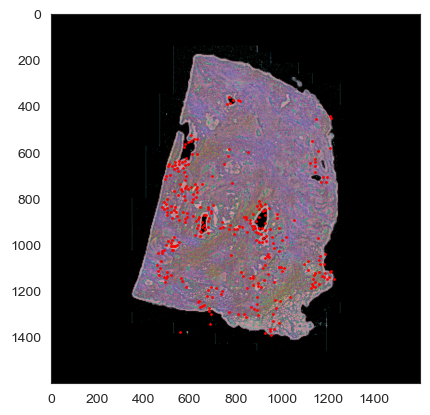

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(om.tl.tensor2im(tensor_M))
ax.scatter(kd.dataset["train_input"][:, 0], kd.dataset["train_input"][:, 1], c='r', s=1)


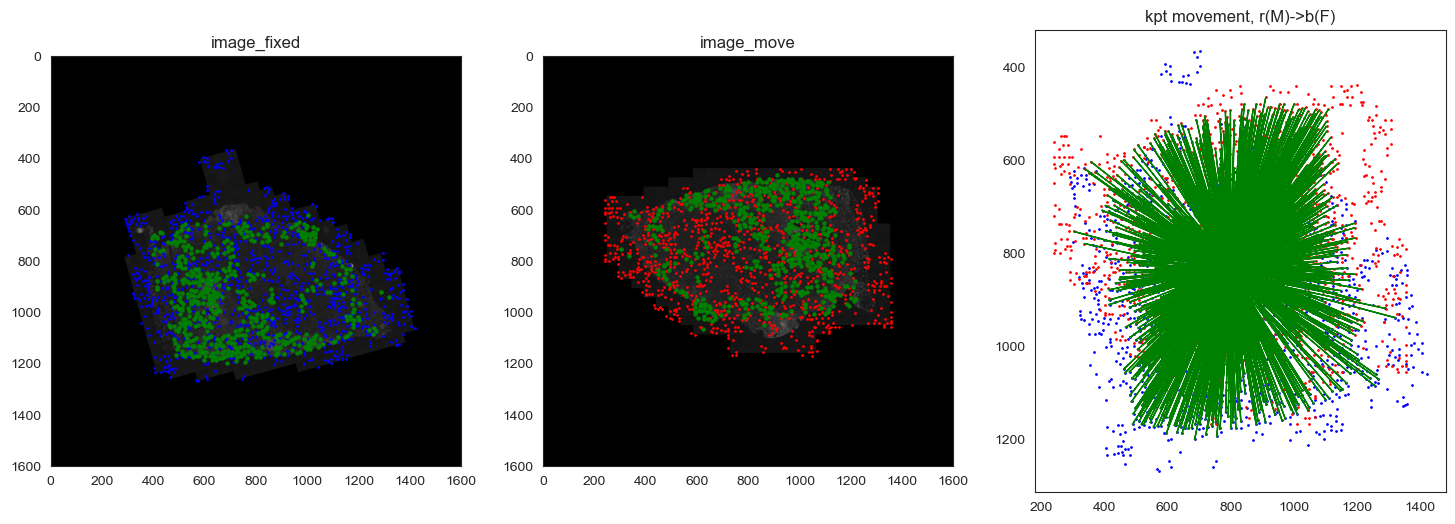

In [47]:
# file_kpt = "/cluster/home/bqhu_jh/projects/scGaussian3dGen/analysis/panlab/v1/04.detect_kpts/ALL-TLS_100/omni_stack/HE_P1.pth"
file_kpt = "/cluster/home/bqhu_jh/projects/scGaussian3dGen/analysis/panlab/v1/04.detect_kpts/ALL-TLS_100/omni_stack/P1_P2.pth"
kd = om.kp.KeypointPairs()
kd.dataset = torch.load(file_kpt)
fig = kd.plot_dataset()
fig

In [49]:
l_kpts = torch.load("/cluster/home/bqhu_jh/projects/scGaussian3dGen/analysis/panlab/v1/04.detect_kpts/ALL-TLS_100/l_kpts_pairs.flip_angles.pt")
l_kpts[0]

[tensor([[ 588.,  994.],
         [ 628.,  994.],
         [ 536.,  994.],
         [ 642., 1026.],
         [ 422.,  706.],
         [ 642.,  966.],
         [ 844., 1100.],
         [ 616.,  948.],
         [ 632., 1038.],
         [ 410.,  702.],
         [ 674., 1132.],
         [ 820., 1138.],
         [ 612.,  964.],
         [ 746., 1158.],
         [ 594.,  946.],
         [ 440.,  718.],
         [ 630.,  956.],
         [ 628.,  972.],
         [ 588., 1038.],
         [ 500.,  934.],
         [ 738., 1174.],
         [ 636.,  974.],
         [ 438.,  892.],
         [ 506.,  958.],
         [ 694., 1114.],
         [ 660., 1090.],
         [ 714., 1082.],
         [ 690.,  658.],
         [ 514.,  944.],
         [ 538., 1012.],
         [ 582.,  984.],
         [ 582.,  928.],
         [ 490.,  976.],
         [ 996., 1128.],
         [ 592.,  954.],
         [ 760., 1132.],
         [ 676., 1174.],
         [ 610.,  990.],
         [ 736.,  626.],
         [ 652., 1018.],


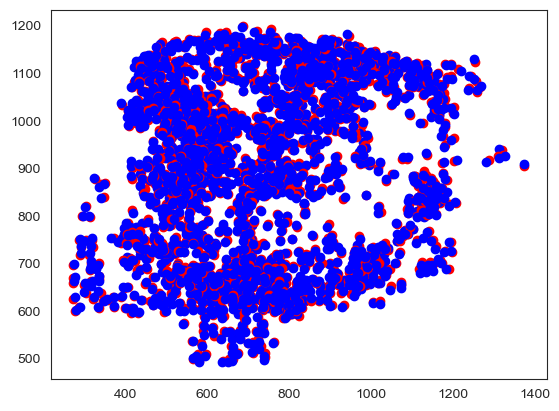

In [53]:
for i in range(len(l_kpts)):
    plt.plot(l_kpts[i][0][:, 0], l_kpts[i][0][:, 1], 'ro')
    plt.plot(l_kpts[i][1][:, 0], l_kpts[i][1][:, 1], 'bo')